# Code Written by:

Balliu Ixhino   n.062339

Ielpo Domenico  n.064141

Pace Alessandro n.063120

# Credit VAR of a Swap

The goal of the project is to compute the Credit VAR (95th percentile) of a swap in which the counterparty might default. The input parameters are:

* The par rate of a set of Overnight Index Swaps (i.e. their market quotation)
* A set of forward libor rates and their fixing dates
* The static data of the swap (nominal, start date, maturity, underlying libor tenor, etc..). The fixed rate of the swap is such that if there was no counterparty risk, the product would be traded at par. You are requested to compute it.
* A set of survival probabilities for the risky counterparty
* The recovery rate for this swap (i.e. the fraction of the market value that it is expected to recover in case of default).
* The volatility of the swap rate, which is assumed to be constant through time (the swap rate is lognormal with fixed volatility)

The swap starts today and the horizon for the VAR calculation is before any future payments. 

The requested VAR is today’s value at risk, i.e. the 95th percentile of the discounted loss distribution function.

Numerical results must be presented to the examining committee during a presentation in which the candidates will also explain the theoretical framework for credit risk evaluation.




In [28]:
from datetime import date

In [29]:
pricing_date = date(2013, 10, 31)

In [30]:
survival_probabilities = [
    {'date': date(2014, 12, 20), 'ndp': 0.972159727015014},
    {'date': date(2015, 12, 20), 'ndp': 0.942926329174406},
    {'date': date(2016, 12, 20), 'ndp': 0.913448056250137},
    {'date': date(2018, 12, 20), 'ndp': 0.855640452819766},
    {'date': date(2023, 12, 20), 'ndp': 0.732687779675469},
    {'date': date(2033, 12, 20), 'ndp': 0.539046016487758},
]

In [31]:
ois_quotes = [
    {'maturity': 1, 'rate': 0.00106},
    {'maturity': 2, 'rate': 0.00114},
    {'maturity': 3, 'rate': 0.00115},
    {'maturity': 4, 'rate': 0.00117},
    {'maturity': 5, 'rate': 0.00119},
    {'maturity': 6, 'rate': 0.00121},
    {'maturity': 7, 'rate': 0.00122},
    {'maturity': 8, 'rate': 0.00124},
    {'maturity': 9, 'rate': 0.00128},
    {'maturity': 10, 'rate': 0.00131},
    {'maturity': 11, 'rate': 0.00135},
    {'maturity': 12, 'rate': 0.00138},
    {'maturity': 15, 'rate': 0.00152},
    {'maturity': 18, 'rate': 0.00166},
    {'maturity': 21, 'rate': 0.00184},
    {'maturity': 24, 'rate': 0.00206},
    {'maturity': 36, 'rate': 0.00344},
    {'maturity': 48, 'rate': 0.00543},
    {'maturity': 60, 'rate': 0.00756},
    {'maturity': 72, 'rate': 0.00967},
    {'maturity': 84, 'rate': 0.01162},
    {'maturity': 96, 'rate': 0.0134},
    {'maturity': 108, 'rate': 0.01502},
    {'maturity': 120, 'rate': 0.01649},
    {'maturity': 132, 'rate': 0.01776},
    {'maturity': 144, 'rate': 0.01888},
    {'maturity': 180, 'rate': 0.02137},
    {'maturity': 240, 'rate': 0.02322},
    {'maturity': 300, 'rate': 0.02389},
    {'maturity': 360, 'rate': 0.02416},
]

In [32]:
euribor_6m = [
    {'date': date(2013, 10, 31), 'rate': 0.005},
    {'date': date(2014, 4, 30), 'rate': 0.0058},
    {'date': date(2014, 10, 30), 'rate': 0.0066},
    {'date': date(2015, 4, 30), 'rate': 0.0074},
    {'date': date(2015, 10, 30), 'rate': 0.0082},
    {'date': date(2016, 4, 30), 'rate': 0.009},
    {'date': date(2016, 10, 30), 'rate': 0.0098},
    {'date': date(2017, 4, 30), 'rate': 0.0106},
    {'date': date(2017, 10, 30), 'rate': 0.0114},
    {'date': date(2018, 4, 30), 'rate': 0.0122},
    {'date': date(2018, 10, 30), 'rate': 0.013},
    {'date': date(2019, 4, 30), 'rate': 0.0138},
    {'date': date(2019, 10, 30), 'rate': 0.0146},
    {'date': date(2020, 4, 30), 'rate': 0.0154},
    {'date': date(2020, 10, 30), 'rate': 0.0162},
    {'date': date(2021, 4, 30), 'rate': 0.017},
    {'date': date(2021, 10, 30), 'rate': 0.0178},
    {'date': date(2022, 4, 30), 'rate': 0.0186},
    {'date': date(2022, 10, 30), 'rate': 0.0194},
    {'date': date(2023, 4, 30), 'rate': 0.0202},
    {'date': date(2023, 10, 30), 'rate': 0.021},
    {'date': date(2024, 4, 30), 'rate': 0.0218},
    {'date': date(2024, 10, 30), 'rate': 0.0226},
    {'date': date(2025, 4, 30), 'rate': 0.0234},
    {'date': date(2025, 10, 30), 'rate': 0.0242},
    {'date': date(2026, 4, 30), 'rate': 0.025},
    {'date': date(2026, 10, 30), 'rate': 0.0258},
    {'date': date(2027, 4, 30), 'rate': 0.0266},
    {'date': date(2027, 10, 30), 'rate': 0.0274},
    {'date': date(2028, 4, 30), 'rate': 0.0282},
]

In [33]:
irs_to_price = {
    'nominal': 100e6, 
    'euribor_tenor': 6, #changed to 'euribor_tenor from 'libor_tenor'
    'fixed_leg_frequency': 12,
    'maturity': 120
}

In [34]:
credit_var_date = date(2014, 1, 31)

In [35]:
recovery = 0.4

In [36]:
volatility = 0.2

In [37]:
mc_runs = 10000

In [38]:
percentile = 0.95

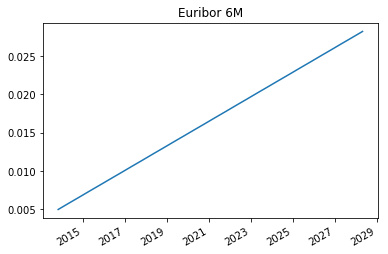

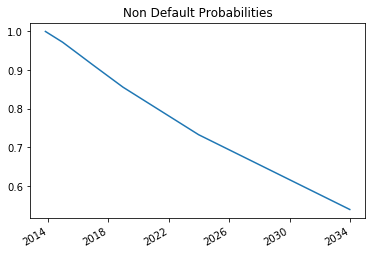

In [39]:
#The first step regards the expression of the inputs in an alternative way so as to be alligned with the finmarket.py functions
#Initially the credit curve, the euribor term structure will be built in dependance 
#of the swap characteristics
from dateutil.relativedelta import relativedelta
from finmarkets import generate_swap_dates
import matplotlib.pyplot as plt

surv_prob_elements=[]
surv_prob_dates=[
        pricing_date,
    ]
non_default_prob=[
        1,
    ]

for x in survival_probabilities:
    i=x['date']
    j=x['ndp']
    surv_prob_dates.append(i)
    non_default_prob.append(j)

surv_prob_elements=[surv_prob_dates, non_default_prob]


euribor_6m_elements=[]
euribor_6m_dates=[]
euribor_6m_rates=[]

for i in range(0,len(euribor_6m)-1):
    i +=1

month_diff=i*6

euribor_6m_dates=generate_swap_dates(pricing_date,month_diff,6)
for x in euribor_6m:
    i=x['rate'] 
    euribor_6m_rates.append(i)

euribor_6m_elements=[euribor_6m_dates,euribor_6m_rates]

#Plot the curves for the "euribor 6m" and the "non default probabilities"
x = euribor_6m_dates;
y = euribor_6m_rates

plt.title("Euribor 6M")
plt.plot(x, y)
plt.gcf().autofmt_xdate()

plt.show()

x = surv_prob_dates;
y = non_default_prob

plt.title("Non Default Probabilities")
plt.plot(x, y)
plt.gcf().autofmt_xdate()

plt.show()

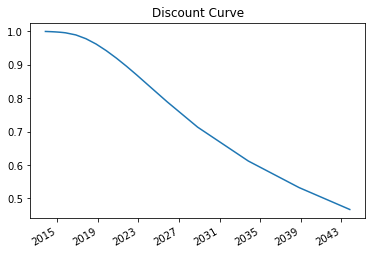

In [40]:
#Now, similary as before, for the ois data, with a little help from lesson's 5 bootstrapping algorithm 

from finmarkets import OvernightIndexSwap, DiscountCurve
from scipy.optimize import minimize

pillar_dates = [pricing_date]

swaps = []

for quote in ois_quotes:
    swap = OvernightIndexSwap(
        
        # notional 
        irs_to_price['nominal'],
        
        # payment dates
        generate_swap_dates(
            pricing_date,
            quote['maturity']
        ),
        
        # the fixed rate
        quote['rate']
        
    )
    swaps.append(swap)
    pillar_dates.append(swap.payment_dates[-1])
    
pillar_dates = sorted(pillar_dates)

n_df_vector = len(pillar_dates)

def objective_function(x):
    
    curve = DiscountCurve(
        
        # today date
        pricing_date,
        
        # pillar dates
        pillar_dates,
        
        # pillar discount factors
        x
        
    )
    
    sum_sq = 0.0
    
    for swap in swaps:
        sum_sq += swap.npv(curve) ** 2
        
    return sum_sq

x0 = [1.0 for i in range(n_df_vector)]
bounds = [(0.01, 100.0) for i in range(n_df_vector)]

# we want to constrain the first pillar discount factor = 1 (because it has pillar date = today)
bounds[0] = (1.0, 1.0)

result = minimize(objective_function, x0, bounds=bounds)

#The construction of the discount curve 
ois_discount_curve=list(result.x)

ois_elements=[pillar_dates, ois_discount_curve]

#Plot the "Discount Curve" 
x = pillar_dates;
y = ois_discount_curve

plt.title("Discount Curve")
plt.plot(x, y)
plt.gcf().autofmt_xdate()

plt.show()

In [41]:
#Now the fair swap rate value will be calculated (i.e. npv_fixed_leg=npv_floating_leg) 
#Fixed swap rate arbitrarily chosen at 2.5%

from finmarkets import InterestRateSwap, ForwardRateCurve

#create the apposite structure of the multi-curve approach through the euribor and the ois rates

euribor_6m_fwd_curve=ForwardRateCurve(euribor_6m_dates,euribor_6m_rates)
ois_df_curve=DiscountCurve(pricing_date, pillar_dates,ois_discount_curve)

#begin with "a trial and error" swap rate loop 

arbitrary_swap_rate=0.025
swap_rate_initial=InterestRateSwap(pricing_date,irs_to_price['nominal'],arbitrary_swap_rate,irs_to_price['euribor_tenor'],irs_to_price['maturity']) 

#finding the right fair swap rate
swap_rate=swap_rate_initial.swap_rate(ois_df_curve,euribor_6m_fwd_curve)

fair_swap_rate=InterestRateSwap(pricing_date,irs_to_price['nominal'],swap_rate,irs_to_price['euribor_tenor'],irs_to_price['maturity']) 

In [42]:
#The next steps consider the calculation of the CreditVar of the Swap - The elements are:
#1. Some random default dates generated by inverting the Hazard Function - for the indicative function
#2. The Exposure at Default
#3. The Recovery Rate: 40% (given by default)
#4. The percentile: 95% (given by default)

from finmarkets import CreditCurve
import numpy

expiry_date=pricing_date+relativedelta(months=irs_to_price['maturity'])
ttm=(expiry_date - pricing_date).days

cc=CreditCurve(
    surv_prob_dates,
    non_default_prob
)

#Now in order to interpolate some random default dates we will need:

#I.The x-axis represented by the hazard function quantiles -
daily_dates=[]

for x in range(0,ttm):
    y=pricing_date + relativedelta(days=x)
    daily_dates.append(y)
    
intensities=[]

for x in daily_dates:
    y=cc.hazard(x)/365
    intensities.append(y)
    
Lambda = intensities[-1] #since the function is piecewise constant, lambda is immutable

integral_of_lambda=[] #CDF of the intensities or daily hazard rates

for x in range(ttm):
    y+=intensities[x]
    integral_of_lambda.append(y)

quantiles=[] #x-axis elements

for x in range(0,len(integral_of_lambda)):
    y=-numpy.log(1-integral_of_lambda[x])/Lambda
    quantiles.append(y)
     
    
#The y-axis which is represented by a list of days, expressed in maturities, from the pricing to the expiriry date

days=[]
i=0
for x in range(ttm):
    i+=1
    days.append(i)

#Proof that the function works well
#At a certain date, the sum of the probability of default and the non-default probability should be one 
#In this case it is a close approximation 
#Thus, at the expity date:
print(round(cc.ndp(expiry_date)+integral_of_lambda[-1]))

1


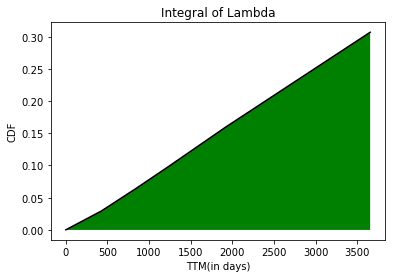

In [43]:
#Plot the "Integral of Lambda" 
x = days
y = integral_of_lambda

fig, (ax1) = plt.subplots()
ax1.plot(x, y, color='black')
ax1.fill_between(x, y, facecolor="green", interpolate=True)
ax1.set_title("Integral of Lambda")
plt.xlabel('TTM(in days)')
plt.ylabel('CDF')

plt.show()

In [44]:
#Generate normally distributed random numbers
randoms=[]
randoms=numpy.random.uniform(0,1,10000)
#Transform them into exponentials quantiles 
exp_randoms=[]
for z in randoms:
    q=-numpy.log(1-z)/Lambda
    exp_randoms.append(q)

#Interpolation

x=quantiles
y=days
xvals=exp_randoms
default_days=[]


for g in xvals:
    yinterp=numpy.interp(g,x,y)
    default_days.append(round(yinterp))

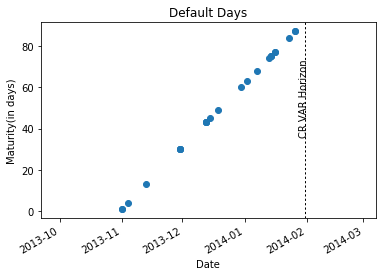

[datetime.date(2013, 11, 1),
 datetime.date(2013, 11, 1),
 datetime.date(2013, 11, 4),
 datetime.date(2013, 11, 13),
 datetime.date(2013, 11, 30),
 datetime.date(2013, 11, 30),
 datetime.date(2013, 11, 30),
 datetime.date(2013, 11, 30),
 datetime.date(2013, 12, 13),
 datetime.date(2013, 12, 13),
 datetime.date(2013, 12, 13),
 datetime.date(2013, 12, 13),
 datetime.date(2013, 12, 15),
 datetime.date(2013, 12, 19),
 datetime.date(2013, 12, 30),
 datetime.date(2014, 1, 2),
 datetime.date(2014, 1, 7),
 datetime.date(2014, 1, 13),
 datetime.date(2014, 1, 14),
 datetime.date(2014, 1, 14),
 datetime.date(2014, 1, 14),
 datetime.date(2014, 1, 16),
 datetime.date(2014, 1, 16),
 datetime.date(2014, 1, 23),
 datetime.date(2014, 1, 26),
 datetime.date(2014, 1, 26)]

In [45]:
#Finding the default maturities
z=[]
for k in default_days:
     if default_days[k] <= (credit_var_date-pricing_date).days:
        z.append(default_days[k])
        
z_sorted=sorted(z)
        
dates_of_default=[]
for j in z_sorted:
    dates_of_default.append(pricing_date + relativedelta(days=j))


plt.title("Default Days")
plt.scatter(dates_of_default,z_sorted)
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Maturity(in days)')
plt.axvline(x=date(2014,1,31), ymin=0, ymax=90,linestyle=':',linewidth=1, color = 'k')
plt.text(date(2014,1,28), 70,r'CR VAR Horizon',fontsize=10, rotation=90)

plt.show()
dates_of_default

In [57]:
#Calculation of the Exposure at Default

from numpy.random import normal
exposure_at_default = []
result=[]
S=swap_rate
A=fair_swap_rate.annuity(ois_df_curve)
T=ttm/365

for day in dates_of_default:
# performs the Monte Carlo simulation - loop over each scenario
    
    for i_scenario in range(mc_runs):
    
    # simulates the swap rate
        S_simulated = S * numpy.exp(-0.5 * volatility**2 * T + volatility * numpy.sqrt(T) * normal())
    
    # calculates the swap NPV
        swap_npv = irs_to_price['nominal'] * (S_simulated - S)*(A/ois_df_curve.df(day))  
       
        result.append(swap_npv)
    
# Calculates the exposure at default by taking only the positive part of the simulated npvs
    exposure_at_default.append(max(0,numpy.mean(result)))
exposure_at_default

[0,
 0,
 254600.1451894104,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 42564.013273505618,
 181858.25137516682,
 207013.8599987349,
 187284.39973108584,
 335263.04530318017,
 226759.72656014841,
 242195.89063173952,
 231701.71514867485,
 135088.79782898494,
 132307.1595531491,
 212989.92151643554,
 283117.81673065887,
 289817.41058378818]

In [58]:
#The distribution of losses given the Recovery Rate
losses_distribution=[]
losses=[]
for t in range(0,len(exposure_at_default)):
    y=exposure_at_default[t]*(1-recovery)
    if y>0:
        losses.append(y)

losses_distribution=sorted(losses)
losses_distribution

[25538.407964103371,
 79384.295731889462,
 81053.278697390968,
 109114.95082510008,
 112370.63983865151,
 124208.31599924093,
 127793.95290986131,
 136055.83593608905,
 139021.02908920491,
 145317.5343790437,
 152760.08711364624,
 169870.69003839532,
 173890.44635027289,
 201157.8271819081]

Credit Var: 183434.029641


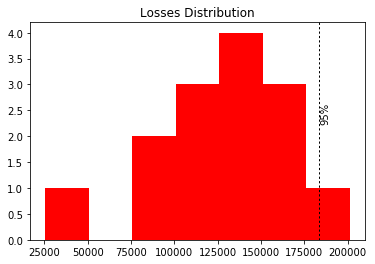

In [65]:
#At the 95% of confidence interval

a=numpy.array(losses_distribution)
Credit_Var=numpy.percentile(a,95)

print('Credit Var:',Credit_Var)

x = losses_distribution
plt.title("Losses Distribution")
plt.hist(x, bins=7, facecolor='red')
plt.axvline(x=Credit_Var, ymin=0, ymax=90,linestyle=':',linewidth=1, color = 'k')
plt.text(Credit_Var+1000, 2.5,r'95%',fontsize=10, rotation=90, color='k')

plt.show()